# Predicting the Likelihood of E-Signing a Loan Based on Financial History

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Importing the Dataset

Download the data from [HERE](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Financial-Data.csv)

In [2]:
dataset = pd.read_csv("financial_data.csv")

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


## Cleaning the Data

In [4]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

## Histograms

In [5]:
dataset2 = dataset.drop(columns=["entry_id", "pay_schedule", "e_signed"])

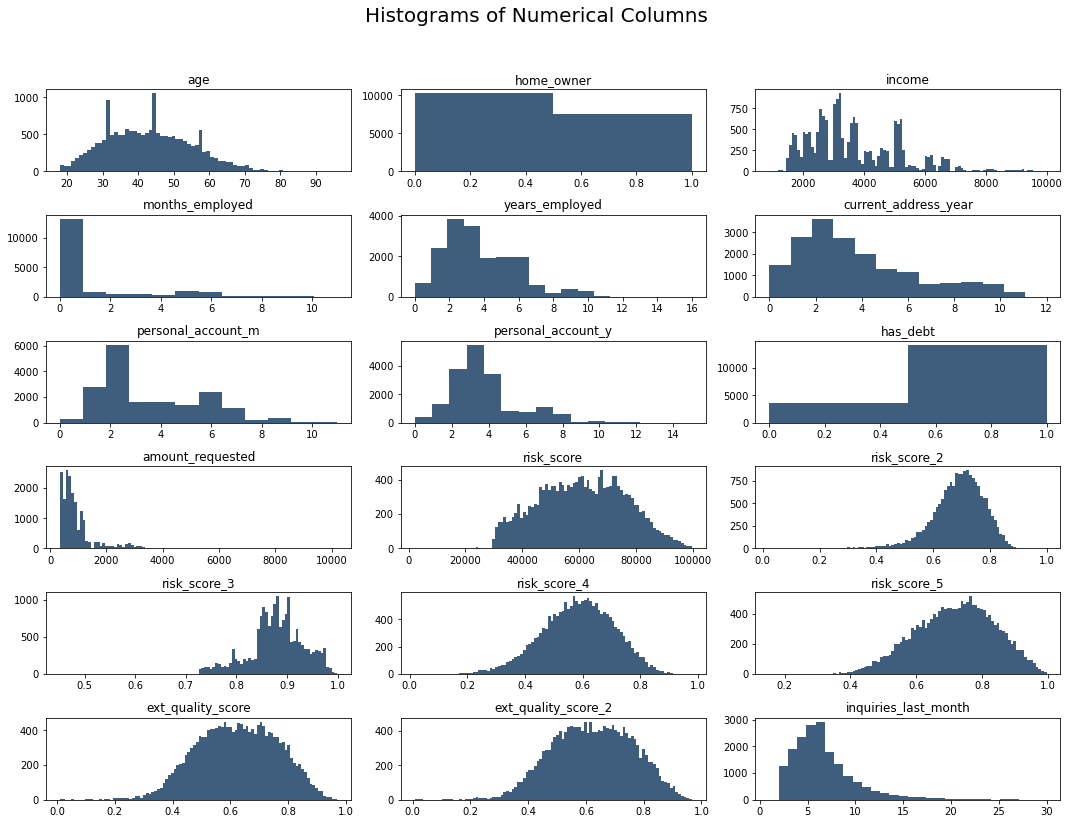

In [6]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle("Histograms of Numerical Columns", fontsize=20)
for i in range(len(dataset2.columns.values)):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    plt.hist(dataset2.iloc[:, i], bins=vals, color="#3f5d7d")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation with Response Variable

<AxesSubplot:title={'center':'Correlation with E-Signed'}>

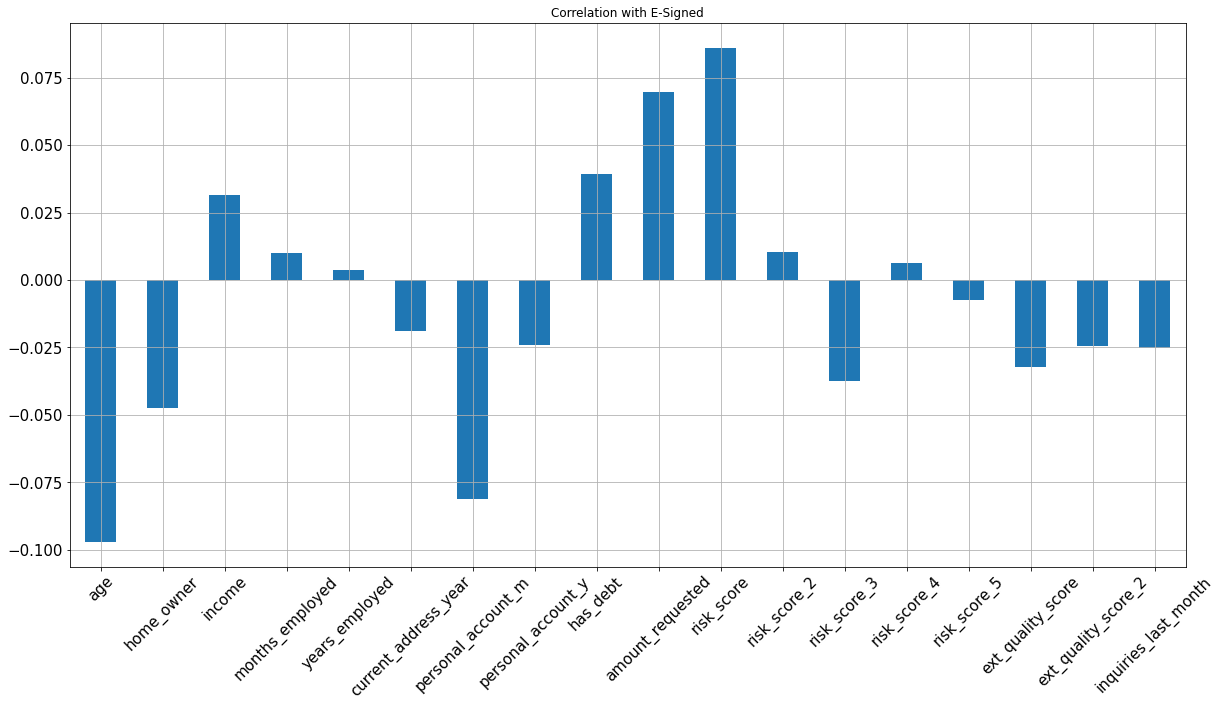

In [7]:
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(20, 10), title="Correlation with E-Signed",
                                             fontsize=15, rot=45, grid=True)

<AxesSubplot:>

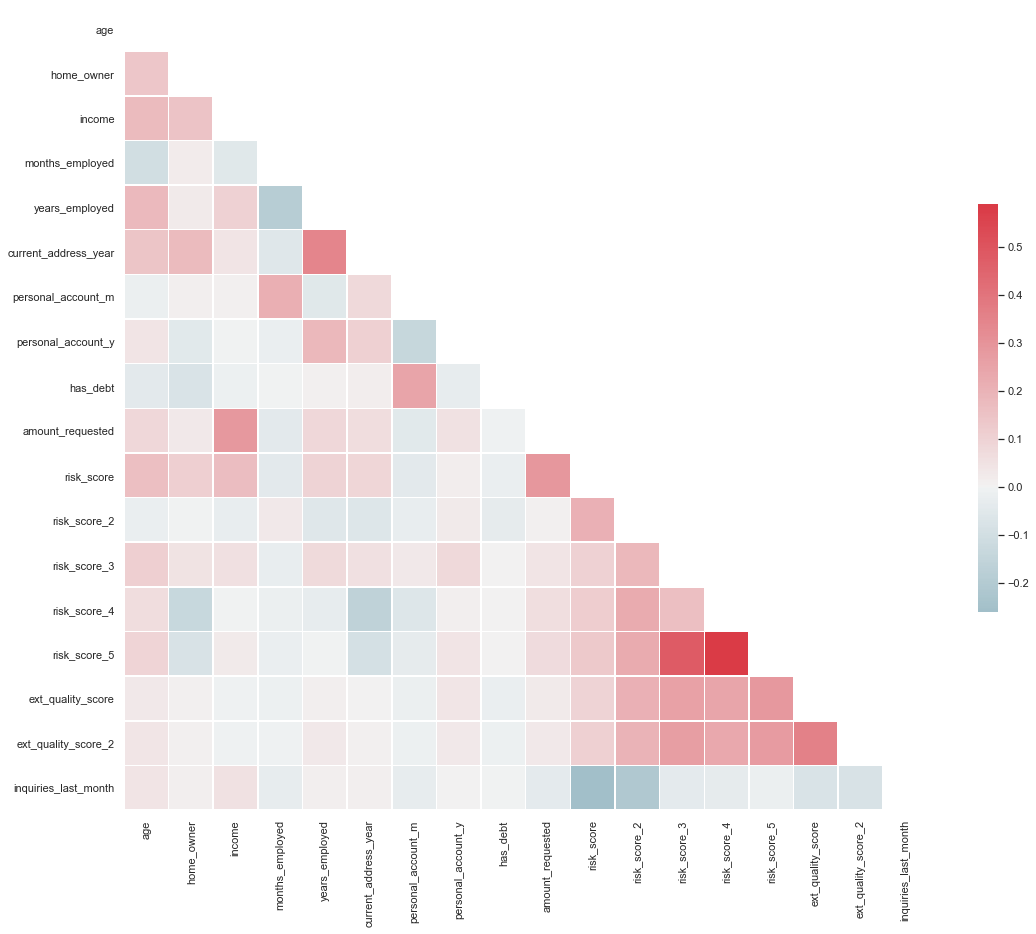

In [9]:
sn.set(style="white")
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

## Feature Engineering

In [10]:
import random
random.seed(100)

In [11]:
dataset = dataset.drop(columns=["months_employed"])
dataset["personal_account_months"] = dataset.personal_account_m + dataset.personal_account_y * 12
dataset = dataset.drop(columns=["personal_account_m", "personal_account_y"])

In [12]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


## One-Hot Encoding

In [13]:
dataset = pd.get_dummies(dataset)

In [14]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [15]:
dataset = dataset.drop(columns=["pay_schedule_semi-monthly"])

## Removing Extra Columns

In [16]:
response = dataset.e_signed
users = dataset.entry_id
dataset = dataset.drop(columns=["e_signed", "entry_id"])

## Splitting into Train and Test Set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model Building

### Comparing Models

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty="l2")
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

##### Predicting Test Set

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([["Logistic Regression", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

#### SVM (Linear)

In [51]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

##### Predicting Test Set

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([["SVM (Linear)", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results = results.append(model_results, ignore_index=True)

#### SVM (rbf)

In [54]:
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(random_state=0)

##### Predicting Test Set

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([["SVM (rbf)", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results = results.append(model_results, ignore_index=True)

#### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_estimators=100, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

##### Predicting Test Set

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([["Random Forest (n = 100)", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results = results.append(model_results, ignore_index=True)

In [60]:
results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948


## K-Fold Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.6301850436830183
0.0125033924622126


## Applying Grid Search

### Round 1: Entropy

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [3, None], "max_features": [1, 5, 10], "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10], "bootstrap": [True, False], "criterion": ["entropy"]}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)

In [ ]:
import time
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

In [65]:
print(t1 - t0)

1233.0520730018616


In [66]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

### Round 2: Entropy

In [67]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [None], "max_features": [3, 5, 7], "min_samples_split": [2, 4],
              "min_samples_leaf": [3, 5, 7], "bootstrap": [True], "criterion": ["entropy"]}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)

In [68]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

In [69]:
print(t1 - t0)

267.21860218048096


### Predicting Test Set

In [71]:
y_pred = grid_search.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([["Random Forest (n = 100, GSx2 + Entropy)", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results = results.append(model_results, ignore_index=True)

In [73]:
results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n = 100, GSx2 + Entropy)",0.630653,0.645223,0.697095,0.670157


### Round 1: Gini

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [3, None], "max_features": [1, 5, 10], "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10], "bootstrap": [True, False], "criterion": ["gini"]}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)

In [75]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

In [76]:
print(t1 - t0)

813.1698634624481


In [77]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

### Round 2: Gini

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth": [None], "max_features": [8, 10, 12], "min_samples_split": [2, 4],
              "min_samples_leaf": [3, 5, 7], "bootstrap": [True], "criterion": ["gini"]}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)

In [79]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

In [80]:
print(t1 - t0)

270.61992287635803


### Predicting Test Set

In [81]:
y_pred = grid_search.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([["Random Forest (n = 100, GSx2 + Gini)", acc, prec, rec, f1]], 
             columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results = results.append(model_results, ignore_index=True)

In [83]:
results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n = 100, GSx2 + Entropy)",0.630653,0.645223,0.697095,0.670157
5,"Random Forest (n = 100, GSx2 + Gini)",0.624791,0.640250,0.691390,0.664838


## Formatting Final Results

In [85]:
final_results = pd.concat([y_test, users], axis=1).dropna()
final_results["predictions"] = y_pred
final_results = final_results[["entry_id", "e_signed", "predictions"]].reset_index(drop=True)

In [86]:
final_results

,entry_id,e_signed,predictions
0,6493191,1.0,0
1,8908605,1.0,0
2,6889184,1.0,1
3,9375601,0.0,1
4,8515555,1.0,1
...,...,...,...
3577,5028251,1.0,0
3578,8958068,0.0,0
3579,3605941,0.0,1
3580,1807355,0.0,0
